In [2]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [8]:
print(train_input.shape, test_target.shape)

(5197, 3) (1300,)


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [11]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state= 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


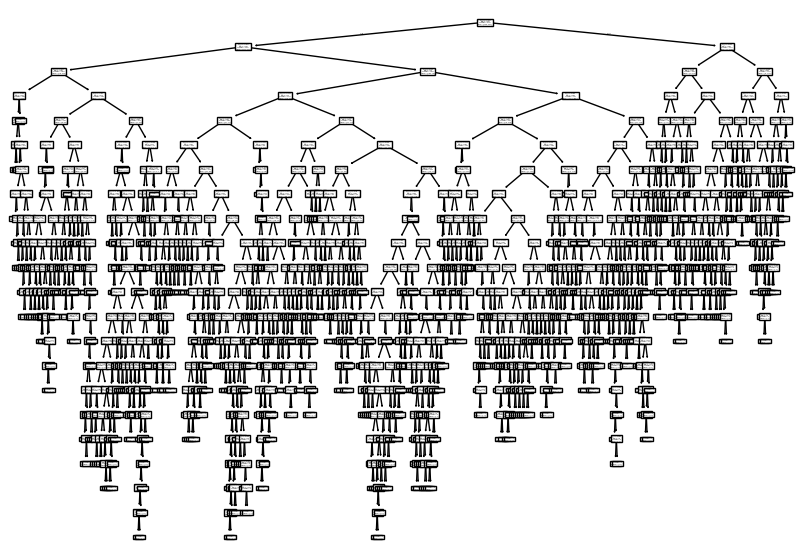

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()


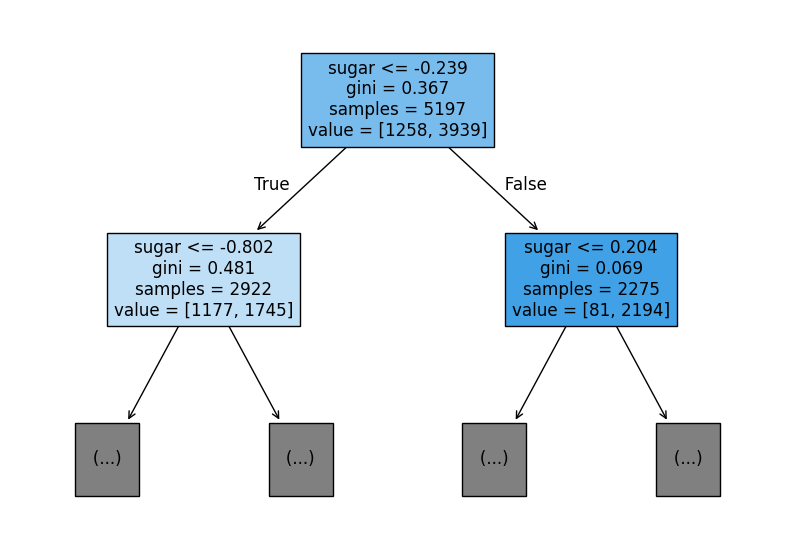

In [14]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

$$
Gini = 1 - \sum p_i^2
$$


In [15]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


[Text(0.5, 0.875, 'sugar <= 4.325\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.625, 'sugar <= 1.625\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'sugar <= 1.375\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(0.0625, 0.125, 'gini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(0.1875, 0.125, 'gini = 0.318\nsamples = 499\nvalue = [99, 400]'),
 Text(0.375, 0.375, 'alcohol <= 11.025\ngini = 0.49\nsamples = 1868\nvalue = [1069, 799]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 1141\nvalue = [798, 343]'),
 Text(0.4375, 0.125, 'gini = 0.468\nsamples = 727\nvalue = [271.0, 456.0]'),
 Text(0.75, 0.625, 'sugar <= 6.45\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'pH <= 3.255\ngini = 0.189\nsamples = 529\nvalue = [56, 473]'),
 Text(0.5625, 0.125, 'gini = 0.098\nsamples = 329\nvalue = [17, 312]'),
 Text(0.6875, 0.125, 'gini = 0.314\nsamples

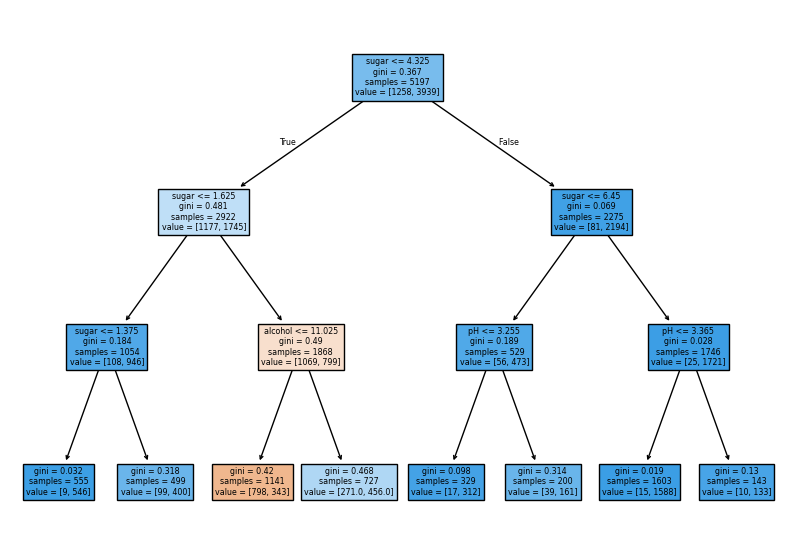

In [16]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True, feature_names = ['alcohol','sugar','pH'])


In [17]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [18]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [19]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [20]:
from sklearn.model_selection import train_test_split
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


**Cross Validation**

In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00054264, 0.        , 0.02024293, 0.00601172, 0.00595498]), 'score_time': array([0.        , 0.        , 0.00099754, 0.00099969, 0.00099707]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [23]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


**Grid Search**

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [25]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [26]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [27]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [28]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


extract most high value through argmax()


In [29]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


***Summary***
1. Specify the parameters to explore
2. Find the combination of parameters that give the best mean verification score after performing grid installation in the training set
3. Train the model using the full training set in the best parameters

In [30]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001), 'max_depth' : range(5, 20, 1), 'min_samples_split' : range(2, 100, 10)}

In [31]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [32]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [33]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [34]:
from scipy.stats import uniform, randint

In [35]:
params = {'min_impurity_decrease' : uniform(0.0001, 0.001), 'max_depth' : randint(20, 50), 'min_samples_split' : randint(2, 25), 'min_samples_leaf' : randint(1, 25) }

In [36]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E89FAE0EC0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E89FB12F90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E89FC40080>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E89D765FD0>},
                   random_state=42)

In [37]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [38]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [39]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


**Ensemble**

Random Forest

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [42]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [43]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


- oob(out of bag) samlples can be replace cross validate

**Extra tree**

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [45]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


**gradient boosting**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [48]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [49]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15882696 0.6799705  0.16120254]


**histogram-based gradient boosting**

In [59]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
socres = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [60]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats= 10, random_state= 42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [61]:
result = permutation_importance(hgb, test_input, test_target, n_repeats= 10, random_state=42, n_jobs= -1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [62]:
hgb.score(test_input, test_target)

0.8723076923076923

- hist-based gradient boosting algorithem example : XGBoost, LightGBM

In [77]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
